In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [39]:
df = pd.read_csv('/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:

df = df.drop(['CustomerID'], axis=1)
df.head()

df2 = pd.DataFrame({})
df2.head()

""


## Modelo Lineal Multiple



In [41]:
df2 = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df2.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Lineal

In [37]:
# X = df2[['Source', 'Studios']]
X = df2[['Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
Y = df2['Age']

X = sm.add_constant(X)
X = sm.add_constant(X)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo
modelo = sm.OLS(Y, X).fit()
predictions = modelo.predict(X)  # Con el modelo, se calculan las Y´s

modelo.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.990
Date:                Fri, 13 May 2022   Prob (F-statistic):           4.73e-05
Time:                        05:22:56   Log-Likelihood:                -799.12
No. Observations:                 200   AIC:                             1606.
Df Residuals:                     196   BIC:                             1619.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     47.5119      3.089     15.379      0.000      41.419      53.605
Annual Income (k$)        -0.0062      0.036     -0.172      0.864      -0.077       0.065
Spending Score (1-100)    -0.1756      0.037     -4.806      0.000      -0.248      -0.104
Gender_Male                1.1974      1.899      0.631      0.529      -2.548       4.942
==============================================================================
Omnibus:                        4.252   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.331
Skew:                           0.340   Prob(JB):                        0.115
Kurtosis:                       2.761   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


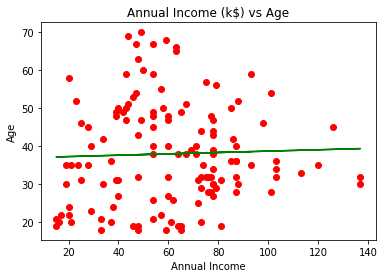

In [42]:
X = df2[['Annual Income (k$)']]
Y = df2['Age']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3) 

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

X = sm.add_constant(X)
X = sm.add_constant(X)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo
modelo = sm.OLS(Y, X).fit()
predictions = modelo.predict(X)  # Con el modelo, se calculan las Y´s

plt.scatter(x_train, y_train, color = "red")  # diagrama de dispersión para trazar las observaciones reales
plt.plot(x_train, lr.predict(x_train), color = "green") # Para la línea de regresión, se usa x_train en el eje x y las predicciones de las observaciones en el eje y.
plt.title("Annual Income (k$) vs Age")
plt.xlabel("Annual Income")
plt.ylabel("Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


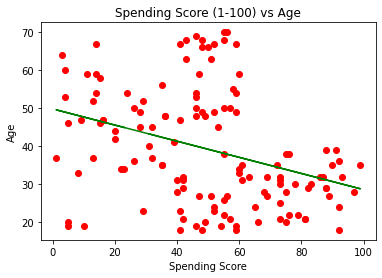

In [43]:
X = df2[['Spending Score (1-100)']]
Y = df2['Age']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3) 

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

X = sm.add_constant(X)
X = sm.add_constant(X)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo
modelo = sm.OLS(Y, X).fit()
predictions = modelo.predict(X)  # Con el modelo, se calculan las Y´s

plt.scatter(x_train, y_train, color = "red")  # diagrama de dispersión para trazar las observaciones reales
plt.plot(x_train, lr.predict(x_train), color = "green") # Para la línea de regresión, se usa x_train en el eje x y las predicciones de las observaciones en el eje y.
plt.title("Spending Score (1-100) vs Age")
plt.xlabel("Spending Score")
plt.ylabel("Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


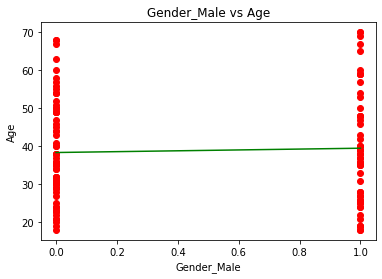

In [44]:
X = df2[['Gender_Male']]
Y = df2['Age']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3) 

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

X = sm.add_constant(X)
X = sm.add_constant(X)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo
modelo = sm.OLS(Y, X).fit()
predictions = modelo.predict(X)  # Con el modelo, se calculan las Y´s

plt.scatter(x_train, y_train, color = "red")  # diagrama de dispersión para trazar las observaciones reales
plt.plot(x_train, lr.predict(x_train), color = "green") # Para la línea de regresión, se usa x_train en el eje x y las predicciones de las observaciones en el eje y.
plt.title("Gender_Male vs Age")
plt.xlabel("Gender_Male")
plt.ylabel("Age")
plt.show()

¿Cuántos intentos o corridas realizaste para obtener los resultados sin errores? Porqué

- Varios intentos, debido a que habían elementos en la tabla de tipo
string, y tuvimos que convertirlos a binario o a int.

¿Cómo los resolviste los problemas que se presentaron?

- Investigando en internet, y comparando cada variable independiente individualmente para obtener una mejor visualización de la regresión múltiple.

¿Qué resultados arrojó el análisis? Incluye imagen de cada resultado y explica cada uno de los resultados:
Estadística descriptiva
Coeficientes de regresión
Valores actuales y de predicción
Coeficiente de determinación r2
Gráficas

- El análisis arrojó que existe una gran dispersión de datos al utilizar la edad como variable dependiente en nuestro estudio, por lo tanto, no hay una correlación certera utilizando estas variables. Gracias a esto, podemos darnos cuenta de que utilizando K-means, podríamos hayar la correlación entre grupos de dichas variables.

¿Cuáles son tus conclusiones de la modelación?
Sigue el formato pregunta-respuesta.

- Para este dataset, hubiese sido mejor hacer un análisis con K-means, puesto que utilizando regresión lineal múltiple obtuvimos datos sesgados que no presentan una correlación exitosa entre sí.